IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better visual styling
plt.style.use("seaborn-v0_8")
sns.set_palette("deep")


LOAD DATA

In [5]:
df = pd.read_csv("../data/raw/MachineLearningRating_v3.txt", sep="|")

df.head()


C:\Users\Kal\AppData\Local\Temp\ipykernel_12252\2551123980.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/MachineLearningRating_v3.txt", sep="|")


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


BASIC DATA UNDERSTANDING

In [6]:
df.info()

print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

FIX DATA TYPES (DATES & CATEGORICALS)

In [7]:
# Convert date column
df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"], errors="coerce")

# Convert object categories
categorical_cols = df.select_dtypes(include="object").columns
for col in categorical_cols:
    df[col] = df[col].astype("category")


CHECK MISSING VALUES

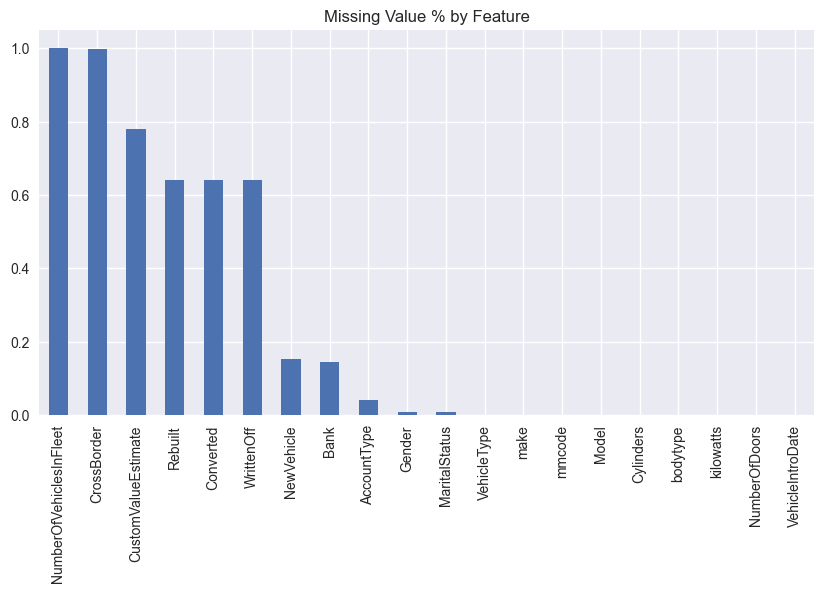

In [8]:
df.isna().sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10,5))
df.isna().mean().sort_values(ascending=False).head(20).plot(kind="bar")
plt.title("Missing Value % by Feature")
plt.show()


DESCRIPTIVE STATISTICS

In [9]:
df.describe()
df[["TotalPremium", "TotalClaims", "CustomValueEstimate"]].describe()


,TotalPremium,TotalClaims,CustomValueEstimate
count,1.000098e+06,1.000098e+06,2.204560e+05
mean,6.190550e+01,6.486119e+01,2.255311e+05
std,2.302845e+02,2.384075e+03,5.645157e+05
min,-7.825768e+02,-1.200241e+04,2.000000e+04
25%,0.000000e+00,0.000000e+00,1.350000e+05
50%,2.178333e+00,0.000000e+00,2.200000e+05
75%,2.192982e+01,0.000000e+00,2.800000e+05
max,6.528260e+04,3.930921e+05,2.655000e+07


CREATE LOSS RATIO

In [10]:
df["LossRatio"] = df["TotalClaims"] / df["TotalPremium"]
df["LossRatio"] = df["LossRatio"].replace([np.inf, -np.inf], np.nan)
df["LossRatio"].mean()


np.float64(0.3498846581363079)

UNIVARIATE ANALYSIS

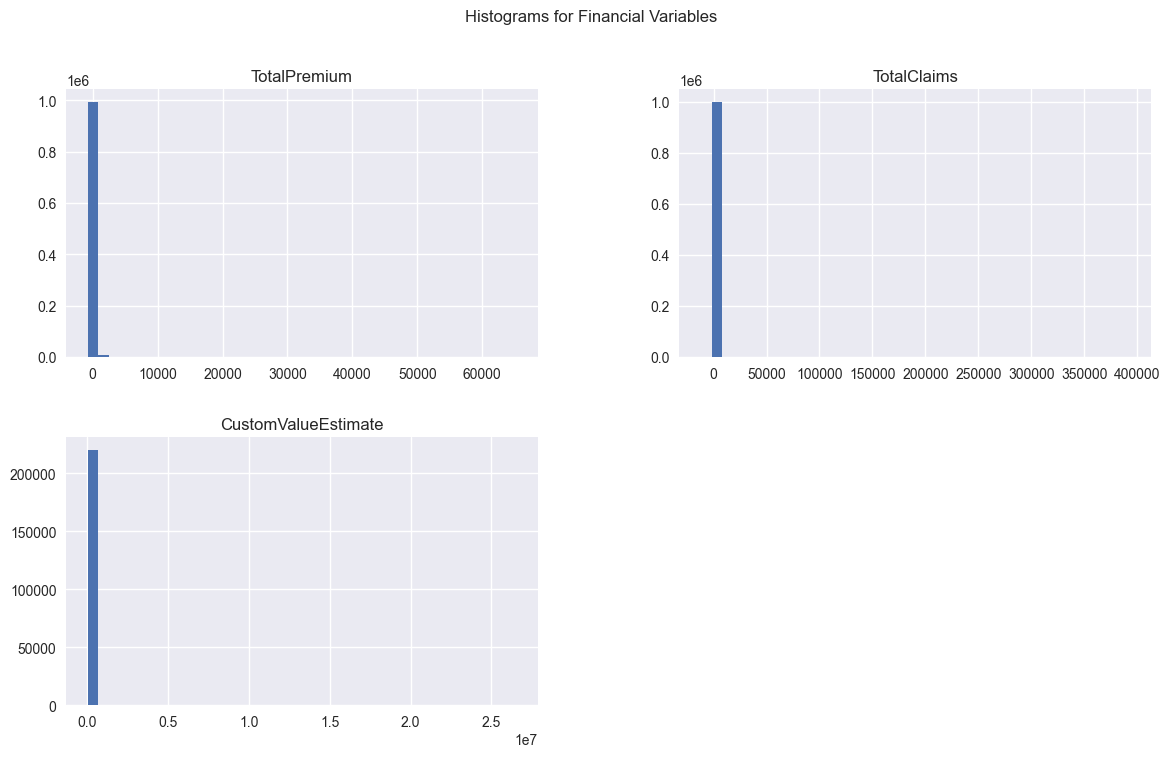

In [11]:
# Histograms for key numeric features
numeric_cols = ["TotalPremium", "TotalClaims", "CustomValueEstimate"]

df[numeric_cols].hist(bins=40, figsize=(14, 8))
plt.suptitle("Histograms for Financial Variables")
plt.show()


OUTLIER DETECTION

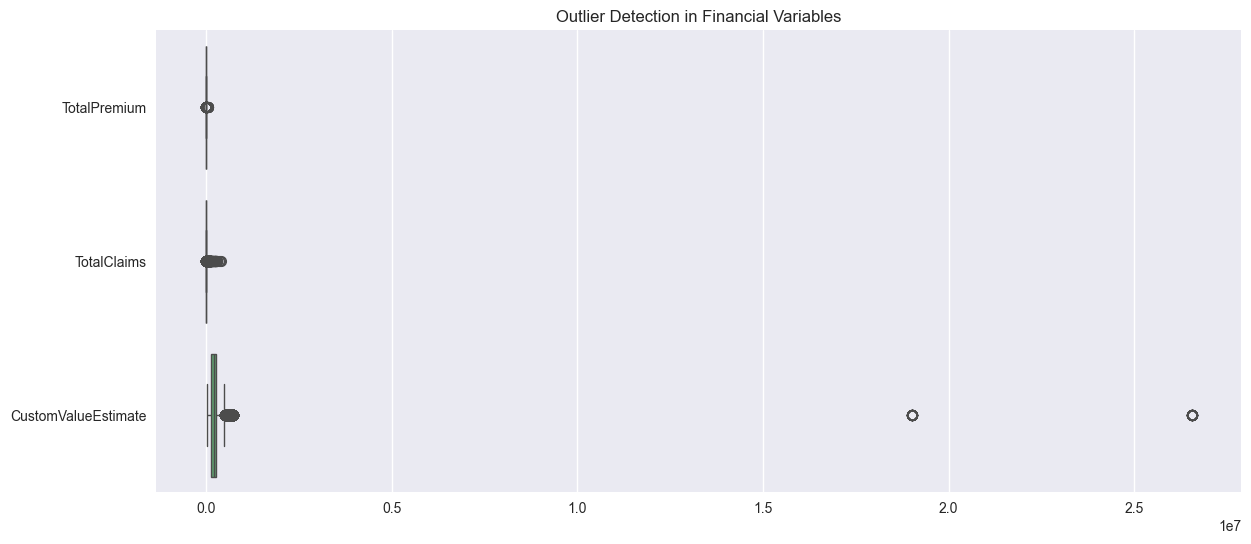

In [12]:
# Boxplots
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numeric_cols], orient="h")
plt.title("Outlier Detection in Financial Variables")
plt.show()


LOSS RATIO BY PROVINCE, VEHICLE TYPE, GENDER

C:\Users\Kal\AppData\Local\Temp\ipykernel_12252\1996323905.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lr_province = df.groupby("Province")["LossRatio"].mean().sort_values()


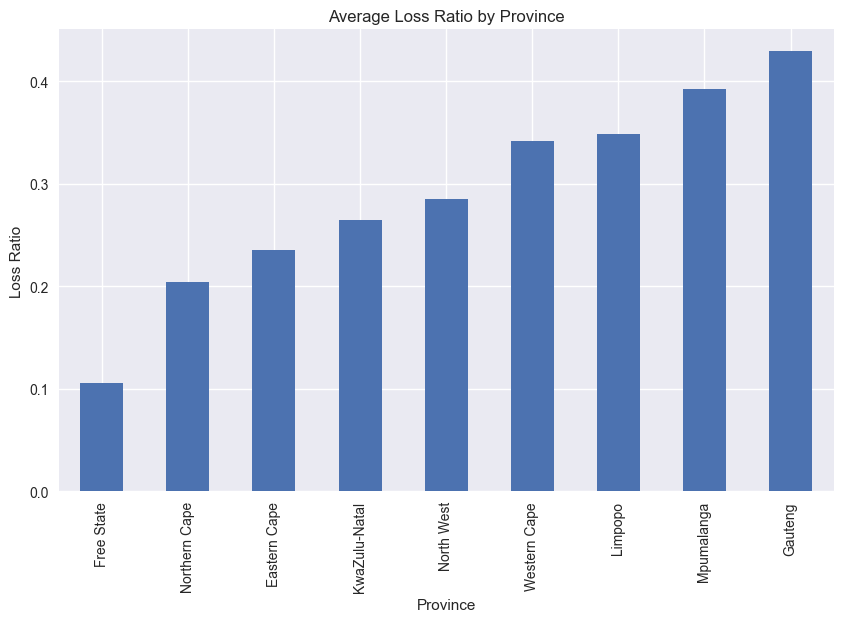

In [13]:
# Province
lr_province = df.groupby("Province")["LossRatio"].mean().sort_values()

plt.figure(figsize=(10,6))
lr_province.plot(kind="bar")
plt.title("Average Loss Ratio by Province")
plt.ylabel("Loss Ratio")
plt.show()


C:\Users\Kal\AppData\Local\Temp\ipykernel_12252\2814642673.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lr_vehicle = df.groupby("VehicleType")["LossRatio"].mean().sort_values()


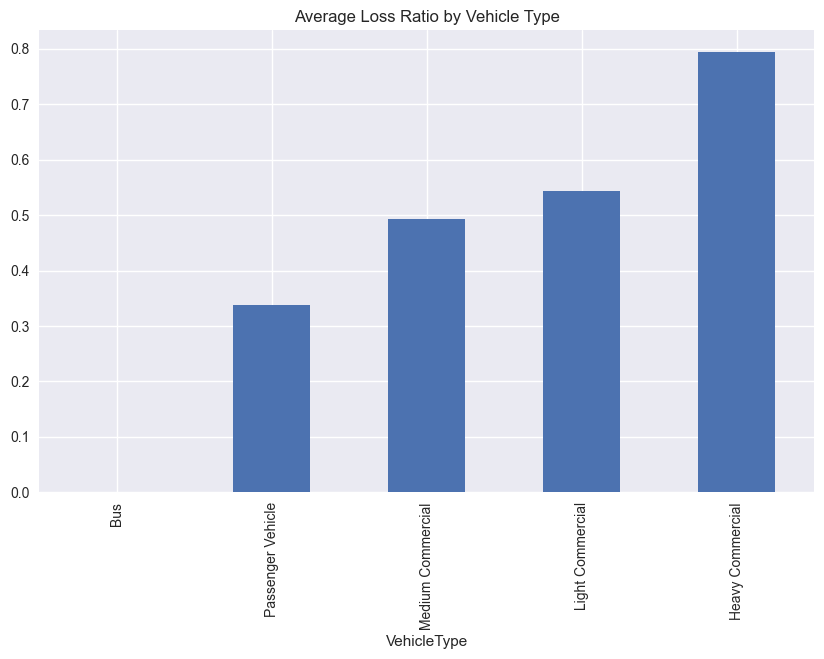

In [14]:
# Vehicle Type
lr_vehicle = df.groupby("VehicleType")["LossRatio"].mean().sort_values()

plt.figure(figsize=(10,6))
lr_vehicle.plot(kind="bar")
plt.title("Average Loss Ratio by Vehicle Type")
plt.show()


C:\Users\Kal\AppData\Local\Temp\ipykernel_12252\968794927.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lr_gender = df.groupby("Gender")["LossRatio"].mean()


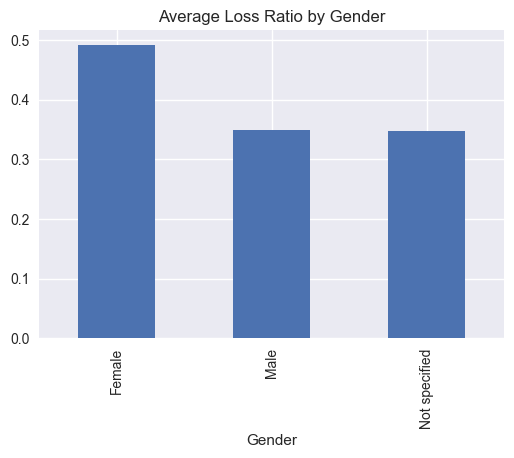

In [15]:
# Gender
lr_gender = df.groupby("Gender")["LossRatio"].mean()

plt.figure(figsize=(6,4))
lr_gender.plot(kind="bar")
plt.title("Average Loss Ratio by Gender")
plt.show()


TEMPORAL TRENDS (18 months)

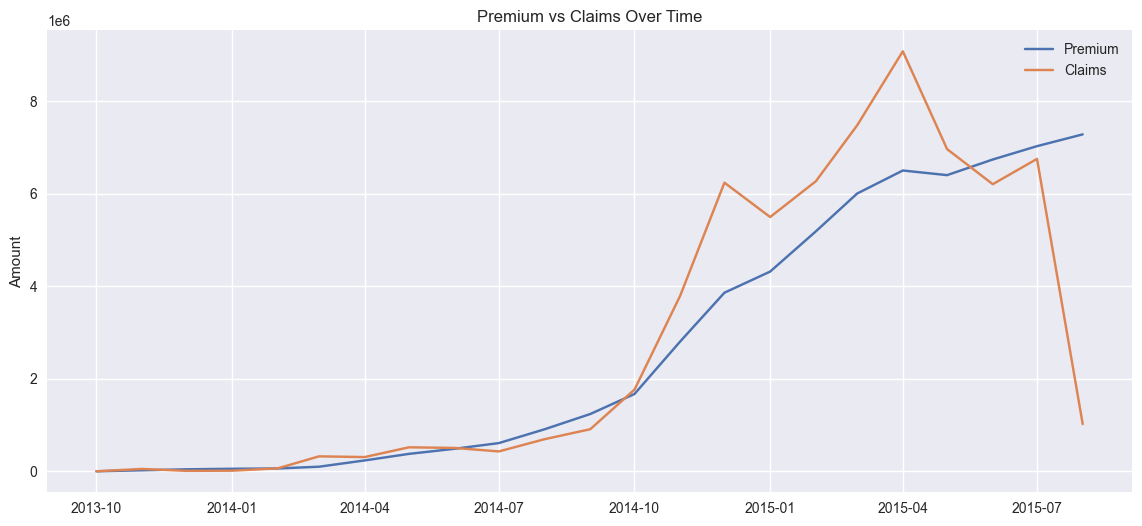

In [16]:
# Claims & Premium trend:
monthly = df.groupby(df["TransactionMonth"].dt.to_period("M")).agg({
    "TotalPremium": "sum",
    "TotalClaims": "sum"
}).astype(float)

monthly.index = monthly.index.to_timestamp()

plt.figure(figsize=(14,6))
plt.plot(monthly.index, monthly["TotalPremium"], label="Premium")
plt.plot(monthly.index, monthly["TotalClaims"], label="Claims")
plt.legend()
plt.title("Premium vs Claims Over Time")
plt.ylabel("Amount")
plt.show()


BIVARIATE / MULTIVARIATE

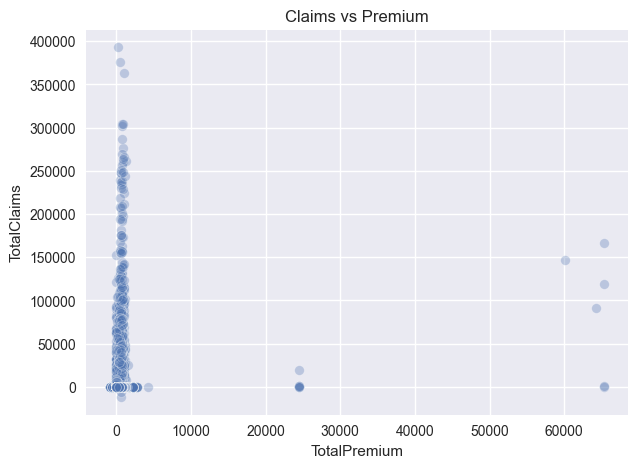

In [17]:
# Claims vs Premium relationship
plt.figure(figsize=(7,5))
sns.scatterplot(x="TotalPremium", y="TotalClaims", data=df, alpha=0.3)
plt.title("Claims vs Premium")
plt.show()


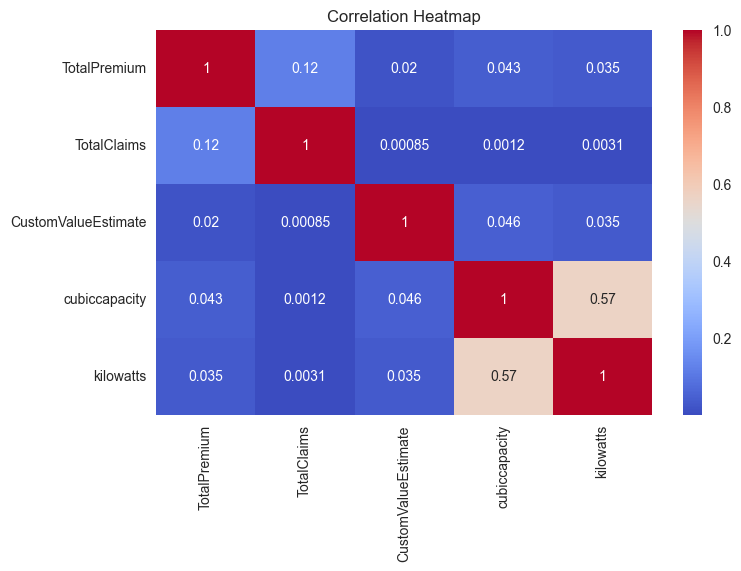

In [21]:
# Correlation Heatmap
corr_cols = ["TotalPremium", "TotalClaims", "CustomValueEstimate", "cubiccapacity", "kilowatts"]

plt.figure(figsize=(8,5))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



GEOGRAPHIC TRENDS

C:\Users\Kal\AppData\Local\Temp\ipykernel_12252\150146118.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("make")["TotalClaims"]


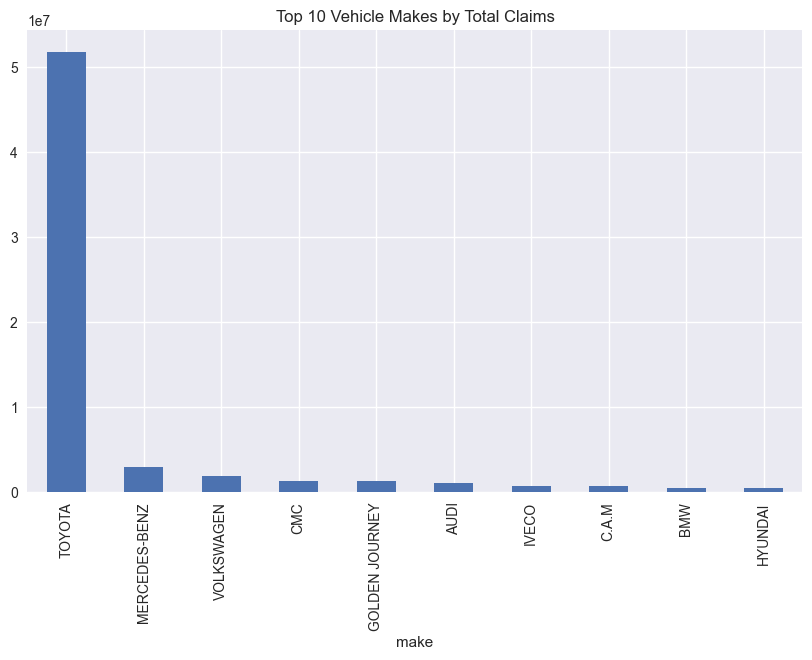

In [23]:
# Vehicle makes by province:
top_models = (
    df.groupby("make")["TotalClaims"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
top_models.plot(kind="bar")
plt.title("Top 10 Vehicle Makes by Total Claims")
plt.show()


ZIP CODE COMPARISON

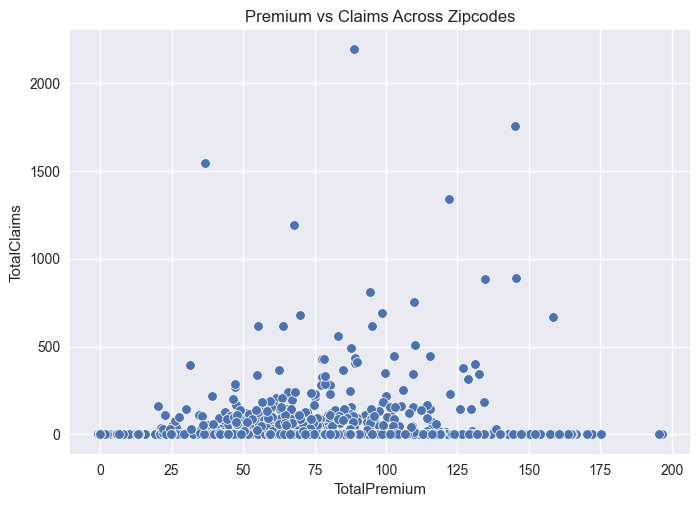

In [ ]:
# Premium vs Claims per zipcode:
zip_stats = df.groupby("PostalCode").agg({
    "TotalPremium": "mean",
    "TotalClaims": "mean",
})
sns.scatterplot(data=zip_stats, x="TotalPremium", y="TotalClaims")
plt.title("Premium vs Claims Across Zipcodes")
plt.show()


SAVE CREATIVE PLOTS FOR YOUR REPORT

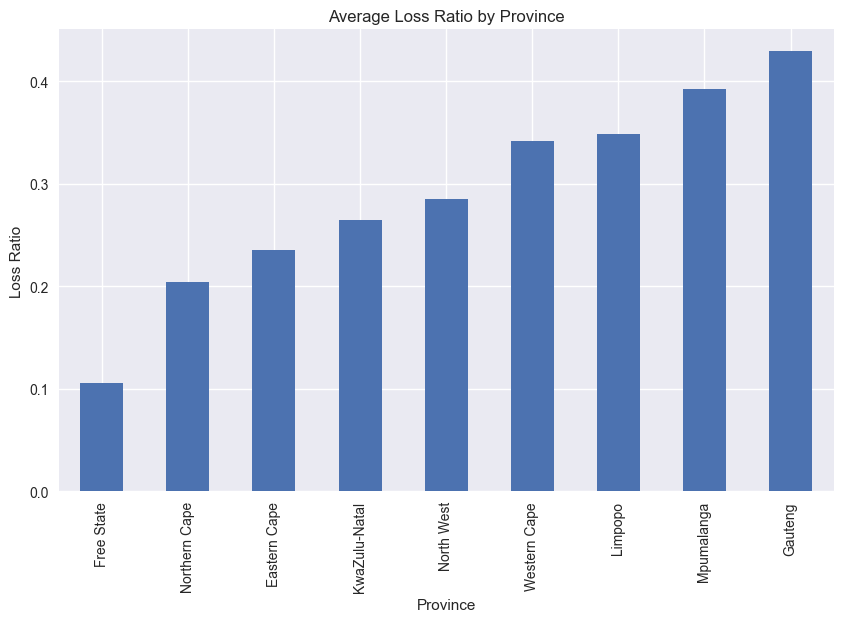

In [25]:
plt.figure(figsize=(10,6))
lr_province.plot(kind="bar")
plt.title("Average Loss Ratio by Province")
plt.ylabel("Loss Ratio")
plt.savefig("../plots/loss_ratio_by_province.png", dpi=300, bbox_inches="tight")
plt.show()


C:\Users\Kal\AppData\Local\Temp\ipykernel_12252\2752433639.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  radar_df = df.groupby("VehicleType")["LossRatio"].mean().dropna()


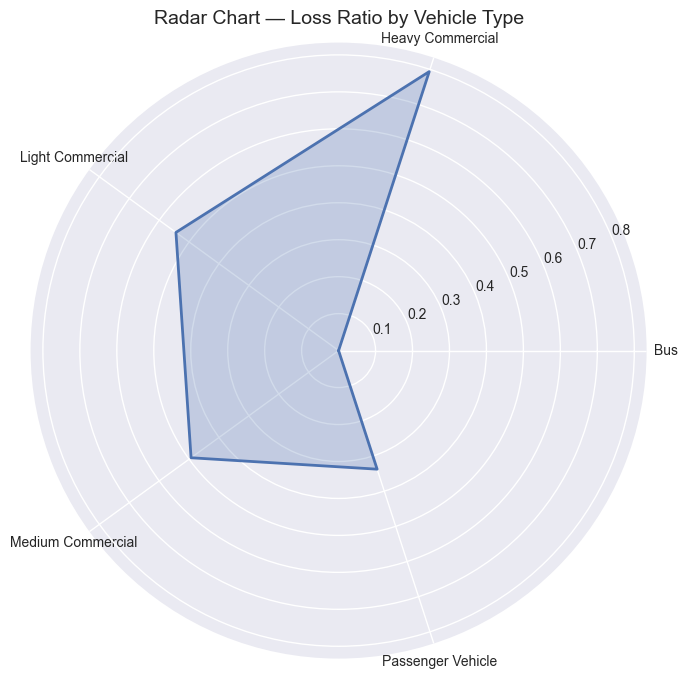

In [29]:
# Radar Chart — Loss Ratio by Vehicle Type
radar_df = df.groupby("VehicleType")["LossRatio"].mean().dropna()

labels = radar_df.index
values = radar_df.values

# Close the radar chart loop
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values = np.concatenate((values, [values[0]]))
angles += angles[:1]

# Plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

ax.plot(angles, values, linewidth=2)
ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title("Radar Chart — Loss Ratio by Vehicle Type", size=14)
plt.savefig("../plots/Radar_chart_loss_ratio_by_vehicle_type.png", dpi=300, bbox_inches="tight")

plt.show()

C:\Users\Kal\AppData\Local\Temp\ipykernel_12252\2881378263.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(


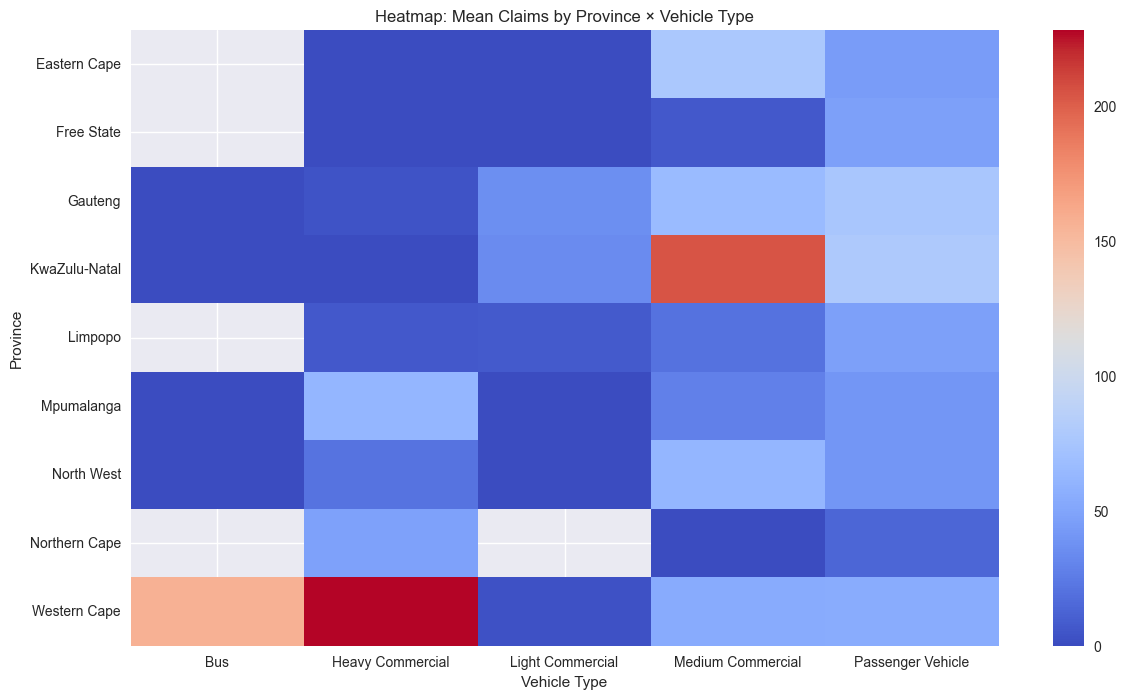

In [32]:
# Heatmap — Province × Vehicle Type (Mean Total Claims)
pivot = df.pivot_table(
    index="Province",
    columns="VehicleType",
    values="TotalClaims",
    aggfunc="mean"
)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot, annot=False, cmap="coolwarm")
plt.title("Heatmap: Mean Claims by Province × Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Province")
plt.savefig("../plots/Heatmap_mean_claims_by_province_Vehicle_type.png", dpi=300, bbox_inches="tight")
plt.show()


Trend Area Chart — Monthly Claim Frequency

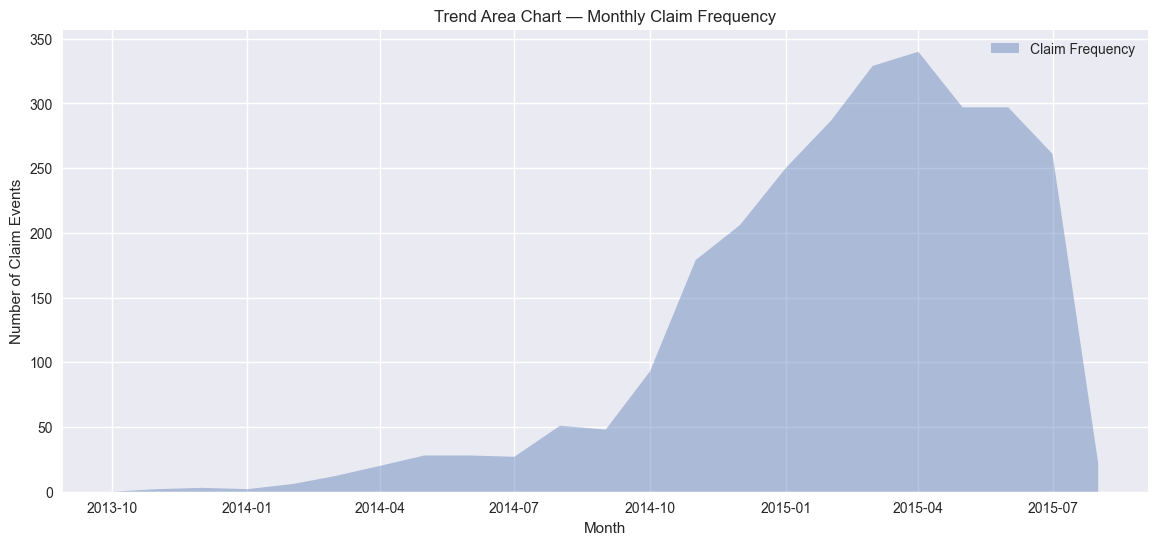

In [33]:
# Create a claim event flag
df["ClaimEvent"] = df["TotalClaims"].apply(lambda x: 1 if x > 0 else 0)

monthly_freq = (
    df.groupby(df["TransactionMonth"].dt.to_period("M"))["ClaimEvent"]
      .sum()
      .astype(int)
)

monthly_freq.index = monthly_freq.index.to_timestamp()

plt.figure(figsize=(14, 6))
plt.stackplot(
    monthly_freq.index,
    monthly_freq.values,
    labels=["Claim Frequency"],
    alpha=0.4
)
plt.title("Trend Area Chart — Monthly Claim Frequency")
plt.ylabel("Number of Claim Events")
plt.xlabel("Month")
plt.legend()
plt.savefig("../plots/Trend_area_chart_monthly_claim_frequency.png", dpi=300, bbox_inches="tight")
plt.show()
